# Assignment 1

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

Show the scatter plot of bi-variate random numbers (2-d samples) $X$ generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales. See https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html for details.
* You can use [`numpy.random.multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html?highlight=multivariate#numpy.random.multivariate_normal) to generate random samples.

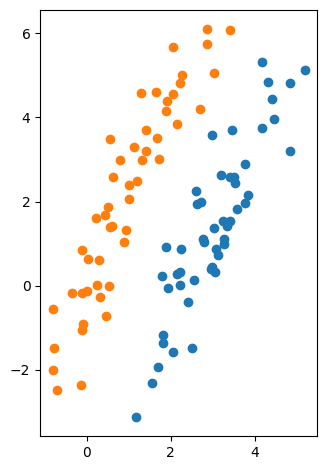

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

N=100
X = np.vstack( [
                multivariate_normal([3, 1], [[1, 2], [2, 5]], size=N//2),
                multivariate_normal([1, 2], [[1, 2], [2, 5]], size=N//2)
               ])
Y = np.hstack( [np.zeros(N//2), np.ones(N//2)])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()


## (2) PCA

Apply PCA to the 2-d samples generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in / library function of PCA, such as `sklearn.decomposition.PCA`)

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales as done in the above.
* `print()` the calculated axis orientation (the slope).


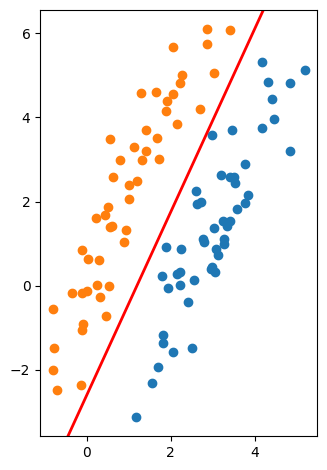

slope = 2.1808348058973284 (65.4 [deg]) 


In [2]:
X_centered = X - np.mean(X, axis = 0)
covariance_matrix = np.cov(X_centered, rowvar = False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
first_pc = sorted_eigenvectors[:, 0]
X_projected = X_centered.dot(first_pc)
slope = first_pc[1] / first_pc[0]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.set_aspect('equal', adjustable='box')
ax.axline((np.mean(X[:, 0]), np.mean(X[:, 1])), slope=slope, color='#FF0000', lw=2)
fig.tight_layout()
plt.show()
pca_theta_max = np.arctan(slope)
print('slope = {} ({} [deg]) '.format(slope, round(np.degrees(pca_theta_max), 1)))

To double-check the optimality of the axis given by PCA, plot the variance $\tilde{\sigma}^2$ at each axis orientation $\theta = [0:\pi]$.  Also `print()` the value of $\theta$ where $\tilde{\sigma}^2$ is maximized.

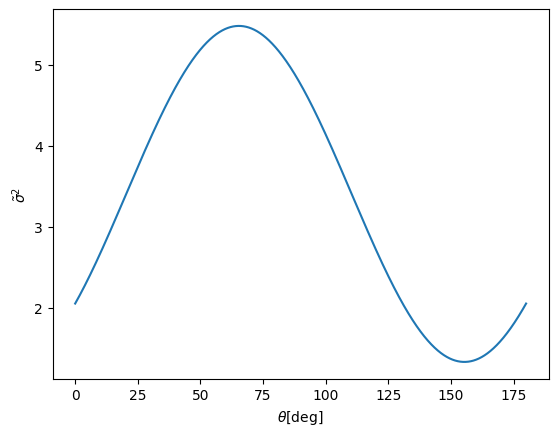

max variance = 5.483035139396335 at 65.4 [deg]


In [3]:
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
angles = np.linspace(0, 180, 20000)
variances = []
for angle in angles:
    direction = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle))])
    projection = X_centered.dot(direction)
    variance = np.var(projection)
    variances.append(variance)
plt.plot(angles, variances)
plt.xlabel(r'$\theta$[deg]')
plt.ylabel(r'$\tilde{\sigma}^2$')
plt.show()

max_var = np.max(variances)
max_var_idx = np.argmax(variances)
max_var_angle = angles[max_var_idx]
print("max variance = {} at {} [deg]".format(max_var, round(max_var_angle, 1)))

##(3) LDA

Apply Fisher LDA to the 2-d samples generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA, such as `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`)

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales as done in the above.


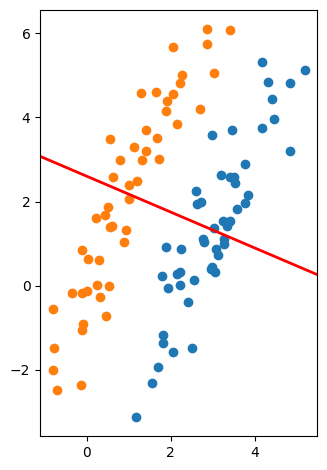

slope = -0.4269627264932867 (156.9 [deg]) 


In [4]:
mean1 = np.mean(X[:N//2], axis=0)
mean2 = np.mean(X[N//2:], axis=0)

Sw = np.zeros((2, 2))
for x in X[:N//2]:
    Sw += np.outer(x - mean1, x - mean1)
for x in X[N//2:]:
    Sw += np.outer(x - mean2, x - mean2)

w = np.linalg.inv(Sw) @ (mean1 - mean2)
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
slope = w[1]/w[0]
ax.axline((np.mean(X[:, 0]), np.mean(X[:, 1])), slope=slope, color='#FF0000', lw=2)
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()
lda_theta_max = np.arctan(slope)
print('slope = {} ({} [deg]) '.format(slope, round(np.degrees(lda_theta_max) + 180, 1)))

To double-check the optimality of the axis given by LDA, plot $\tilde{S}_b / \tilde{S}_w$ at each axis orientation $\theta = [0:\pi]$.  Also `print()` the value of $\theta$ where $\tilde{S}_b / \tilde{S}_w$ is maximized.

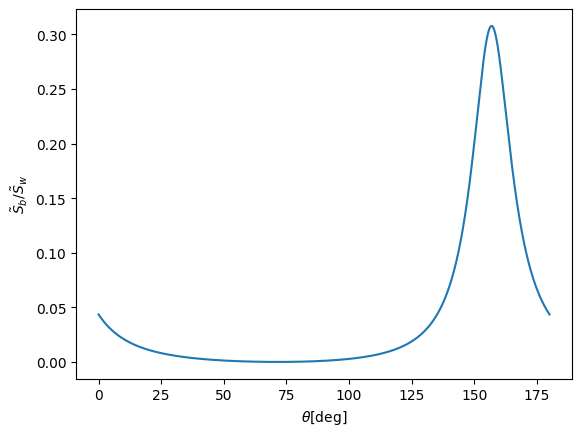

max Sb / Sw = 0.30778080526032764 (156.9 [deg])


In [5]:
Sb = np.outer(mean2 - mean1, mean2 - mean1)

thetas = np.linspace(0, 180, num=20000)
sbd_ratios = []
for theta in thetas:
    w_theta = np.array([np.cos(np.radians(theta)), np.sin(np.radians(theta))])
    sbd_ratio = np.dot(w_theta.T, Sb).dot(w_theta) / np.dot(w_theta.T, Sw).dot(w_theta)
    sbd_ratios.append(sbd_ratio)
idx_max = np.argmax(sbd_ratios)
max_value_angle = thetas[idx_max]
sbd_ratio_max = sbd_ratios[idx_max]
fig, ax = plt.subplots()
ax.plot(thetas, sbd_ratios)
ax.set_xlabel(r'$\theta$[deg]')
ax.set_ylabel(r'$\tilde{S}_b / \tilde{S}_w$')
plt.show()
print(r"max Sb / Sw = {} ({} [deg])".format(sbd_ratio_max, round(max_value_angle, 1)))

## (4) Histograms

Show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).
* You can use [`numpy.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) and/or [`matplotlib.pyplot.hist()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist).

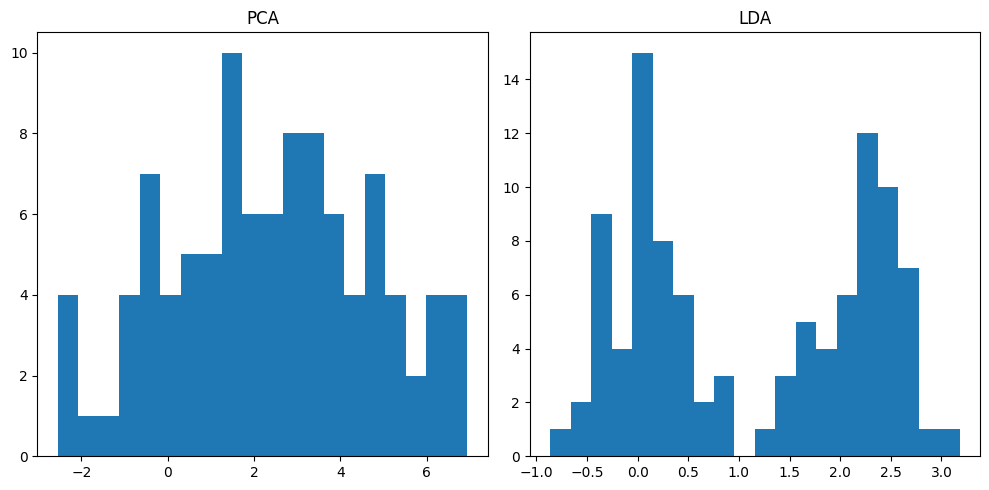

In [6]:
pca_data = X @ np.array([np.cos(pca_theta_max), np.sin(pca_theta_max)])
lda_data = X @ np.array([np.cos(lda_theta_max), np.sin(lda_theta_max)])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].hist(pca_data, bins=20)
ax[0].set_title('PCA')

ax[1].hist(lda_data, bins=20)
ax[1].set_title('LDA')

plt.tight_layout()
plt.show()

# (5) Discussions
The straight line drawn in the first half of question (2) is the axis that maximizes the variance of the entire data set. PCA aims to capture the characteristics of the data distribution by maximizing the variance of the data, ignoring class labels. Therefore, the angle of the slope of the line in the first half of question (2) coincides with the angle at which the variance is maximized in the figure in the second half of qestion (2).

On the other hand, the straight line in the first half of question (3) is intended to divide the data by class by maximizing $\tilde{S}_b$/$\tilde{S}_w$. Here, we define\
$$A\text{ : weight vector}\$$

$$S_b\text{ : the between-class variance}\$$

$$S_w\text{ : the within-class variance}\$$

$\tilde{S}_b$ and $\tilde{S}_w$ are represented as

$$\tilde{S}_b = A^T S_b A$$

$$\tilde{S}_w = A^T S_w A$$

The straight line drawn in the first half of (3) represents the axis on which the data can be best divided by class when plotting the data on that axis. And, the angle of the slope of the line in the first half of qustion (3) coincides with the angle when $\tilde{S}_b$/$\tilde{S}_w$ is maximum in the figure in the second half of question (3). 

The histogram in question (4) shows the distribution of data points when each data point is projected on the axes plotted in questions (2) and (3). It can be seen that the data points on the axis are relatively widely distributed in PCA. On the other hand, the data points on the LDA axis are divided into two peaks within a relatively narrow range. This fact well illustrates the difference between PCA, which aims to capture the characteristics of the data distribution, and LDA, which aims to separate data by class.

# Submit your ipynb

1. Click [Runtime]->[Restart and run all] to make sure that the notebook can run successfully from scratch.
2. Download the notebook as `ipynb` by [File]->[Download] menu.
3. Upload the downloaded `ipynb` to PandA.

